# Proyecto 2 - Modelos de Regresión Lineal
## Universidad del Valle de Guatemala
### Minería de Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge

## 1. Descarga de los conjuntos de datos (ya están cargados en train_df y test_df)

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("Información del dataset de entrenamiento:")
print(train_df.info())
print("\nPrimeras filas del dataset de entrenamiento:")
print(train_df.head())

Información del dataset de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQua

## 2. Análisis exploratorio

In [4]:
train_df.describe()  # Estadísticas básicas de las variables numéricas

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_df.describe(include="O")  # Estadísticas de las variables categóricas

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


valores nulos

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


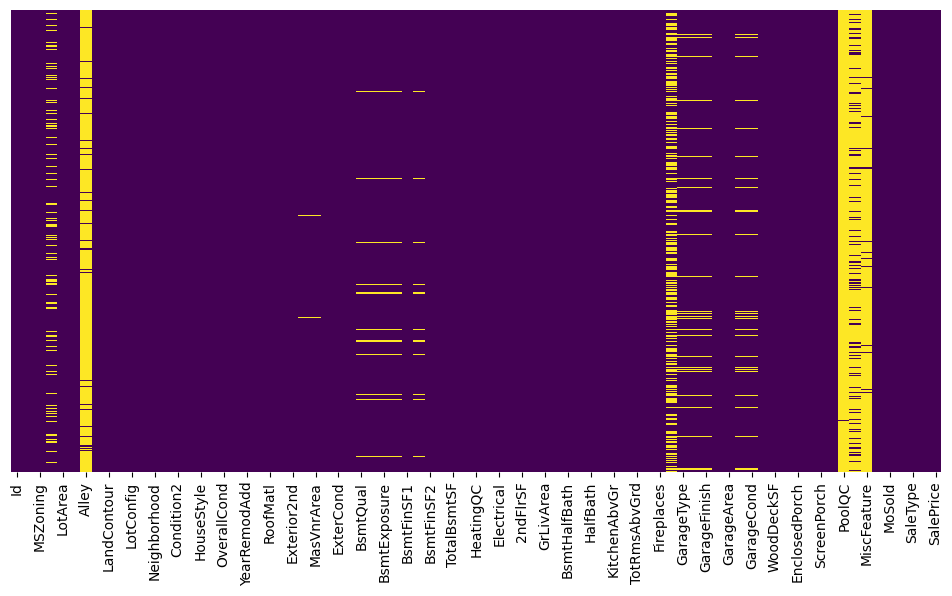

In [6]:
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)
plt.figure(figsize=(12,6))
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

Distribución de la Variable Objetivo (SalePrice)

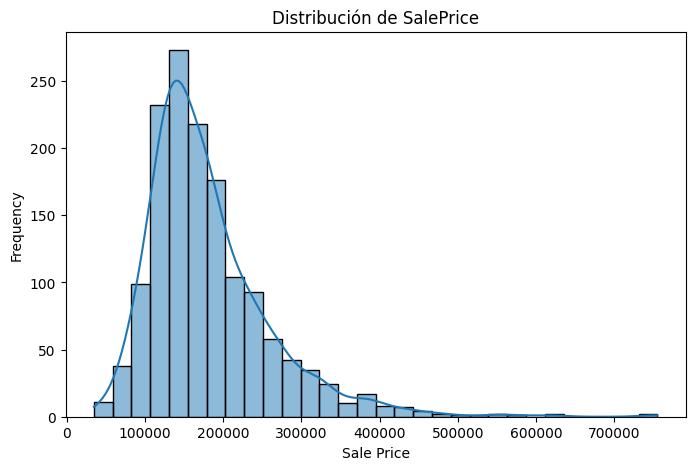

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(train_df["SalePrice"], kde=True, bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribución de SalePrice")
plt.show()

Relación entre Variables Numéricas y SalePrice

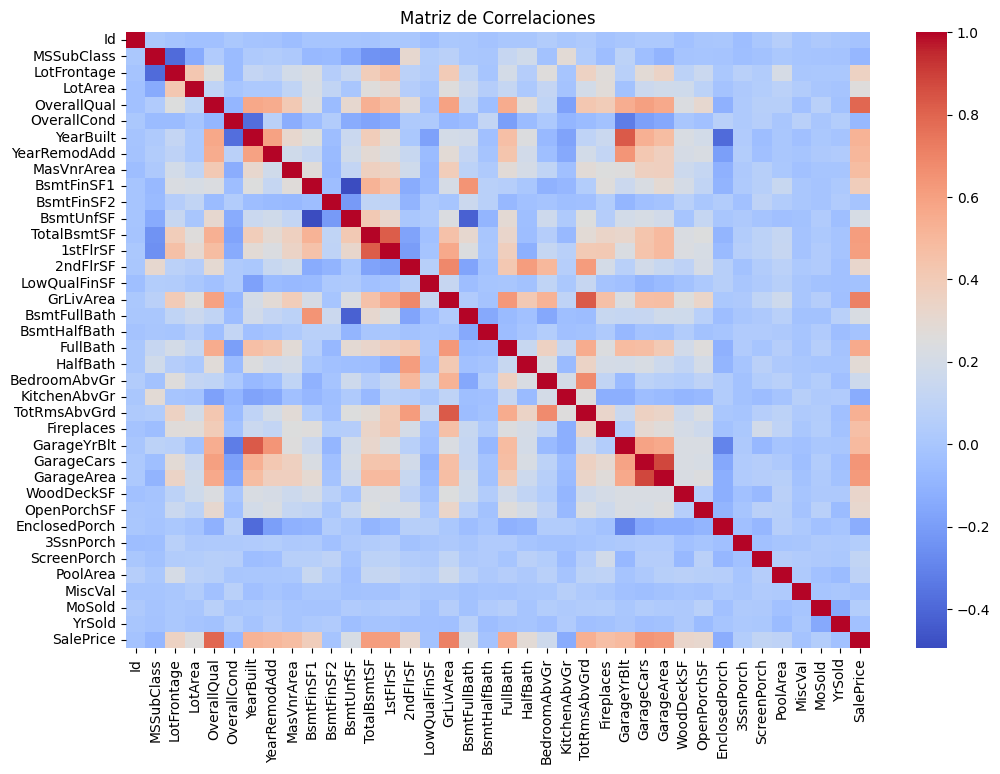

In [8]:
correlation_matrix = train_df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()


Ver los 10 atributos más correlacionados con SalePrice:

In [10]:
top_corr_features = correlation_matrix["SalePrice"].abs().sort_values(ascending=False)[1:11]
print(top_corr_features)


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Gráfico de dispersión con las variables más correlacionadas:

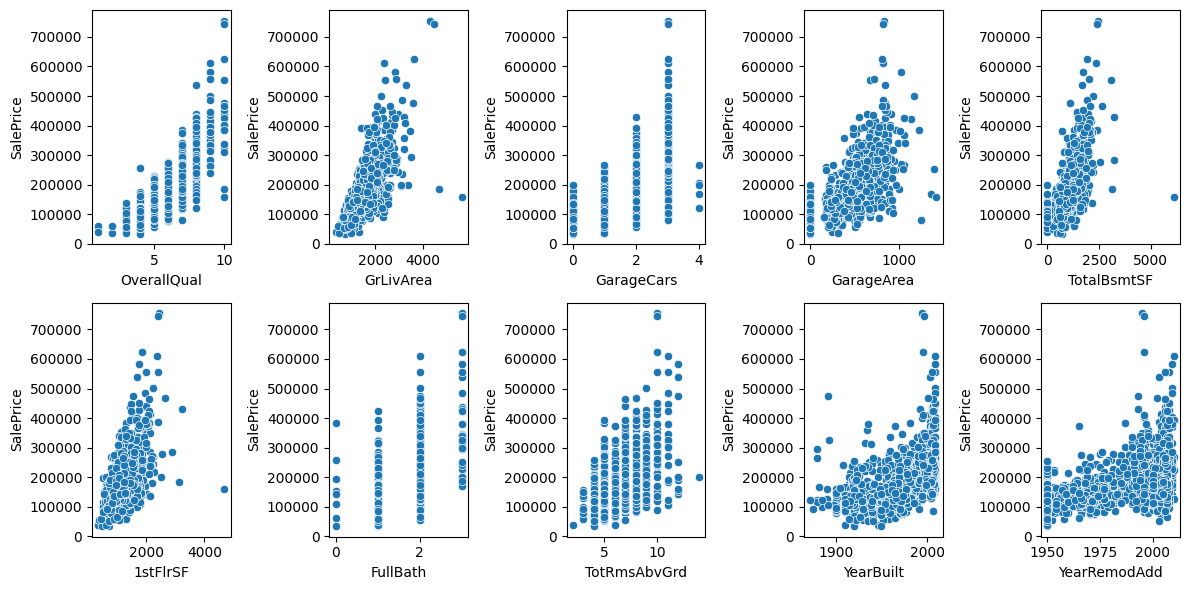

In [11]:
plt.figure(figsize=(12,6))
for i, col in enumerate(top_corr_features.index):
    plt.subplot(2, 5, i+1)
    sns.scatterplot(x=train_df[col], y=train_df["SalePrice"])
    plt.xlabel(col)
plt.tight_layout()
plt.show()


Análisis de Variables Categóricas

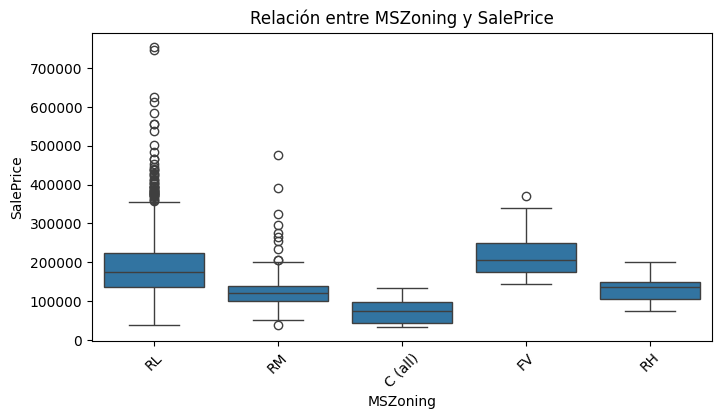

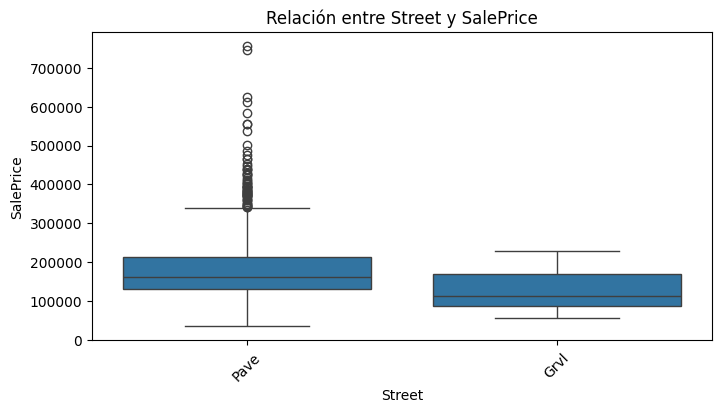

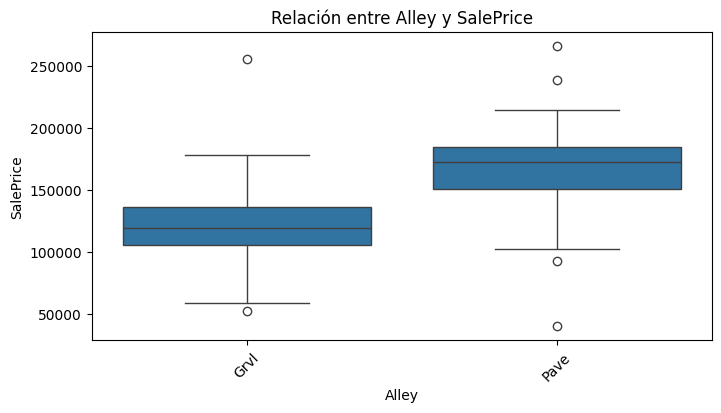

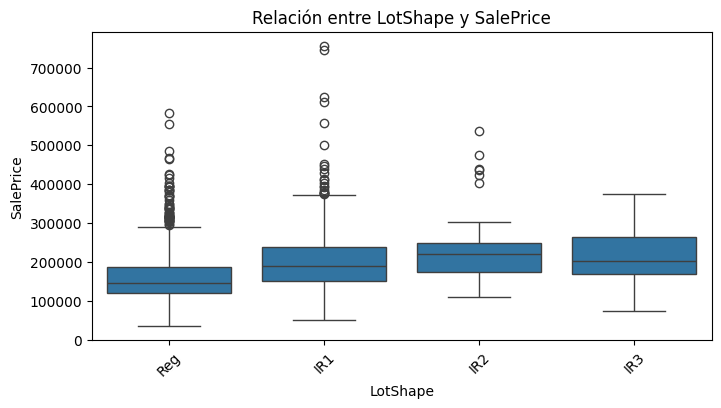

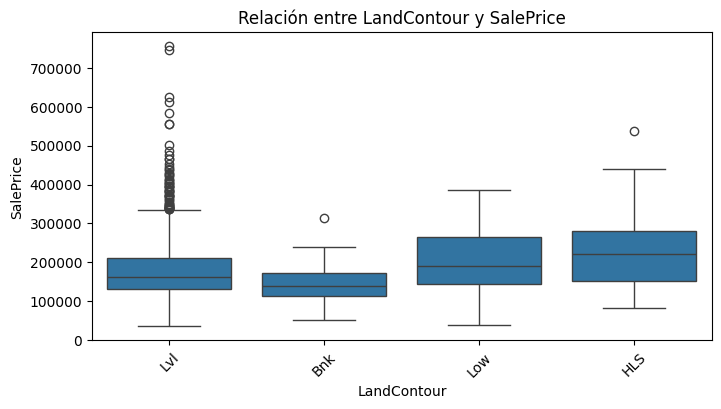

In [12]:
categorical_features = train_df.select_dtypes(include=["object"]).columns
for feature in categorical_features[:5]:  # Limitar a 5 para mostrar ejemplo
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[feature], y=train_df["SalePrice"])
    plt.xticks(rotation=45)
    plt.title(f"Relación entre {feature} y SalePrice")
    plt.show()


Distribución de Variables Numéricas

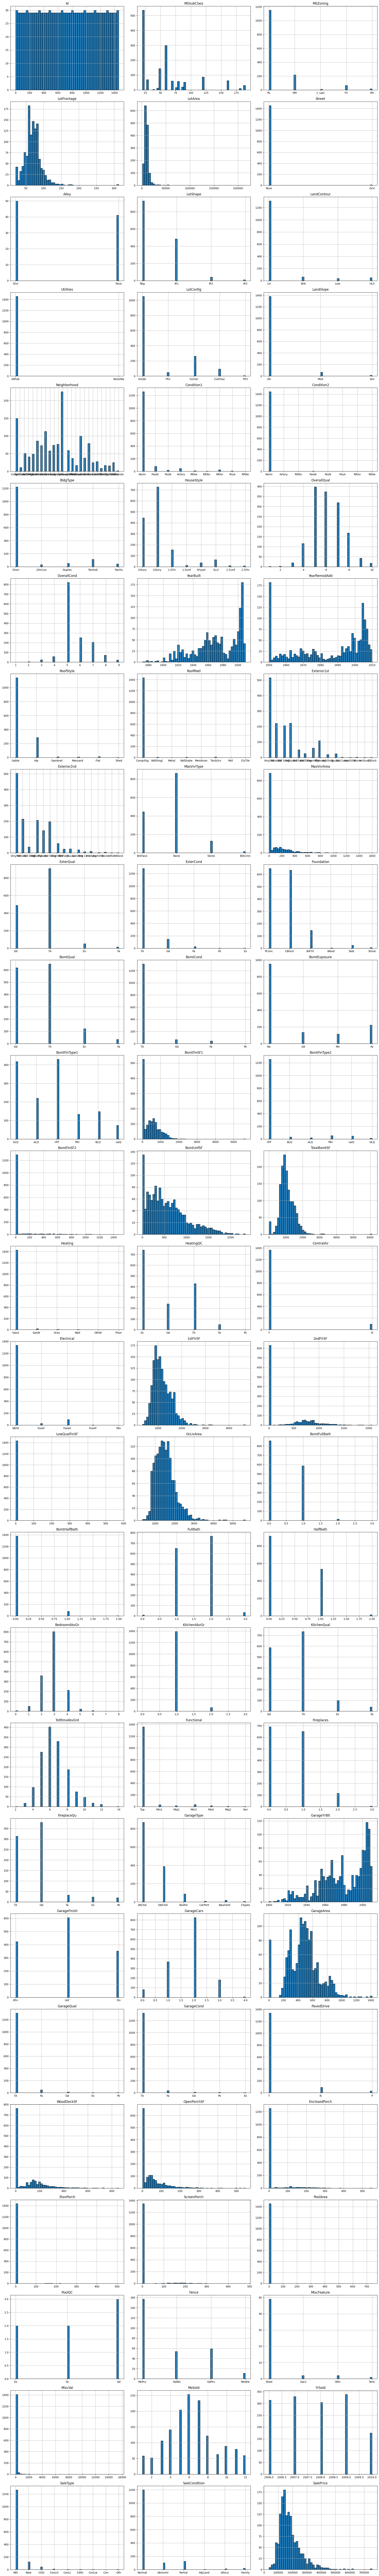

In [13]:
# Definir la cantidad de columnas por fila
cols = 3
rows = (len(train_df.columns) + cols - 1) // cols  # Calcular filas necesarias

# Crear la figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Ajusta el tamaño según el número de filas
axes = axes.flatten()  # Asegurar que podemos indexar los ejes fácilmente

# Generar histogramas
for i, col in enumerate(train_df.columns):
    train_df[col].hist(ax=axes[i], bins=50, edgecolor="black")
    axes[i].set_title(col)

# Eliminar los ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Ajusta los espacios entre gráficos
plt.show()


## 3. Análisis de grupos en los datos

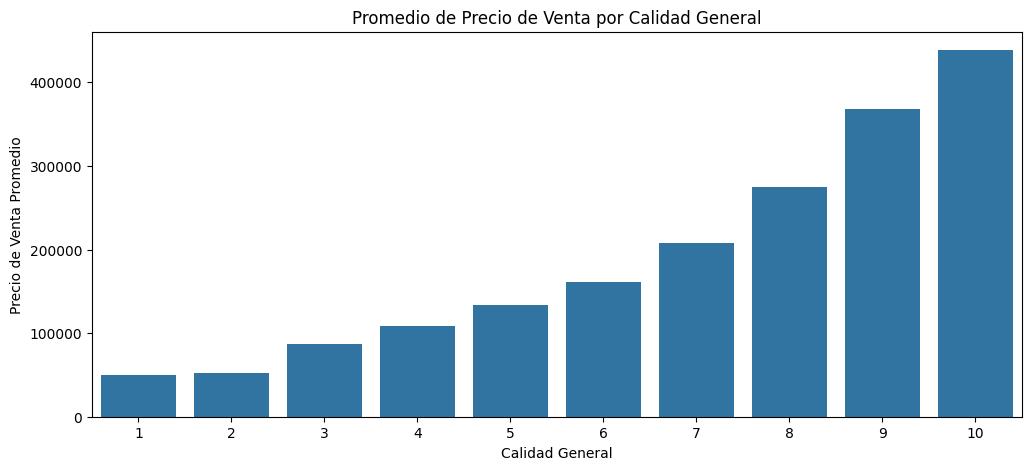

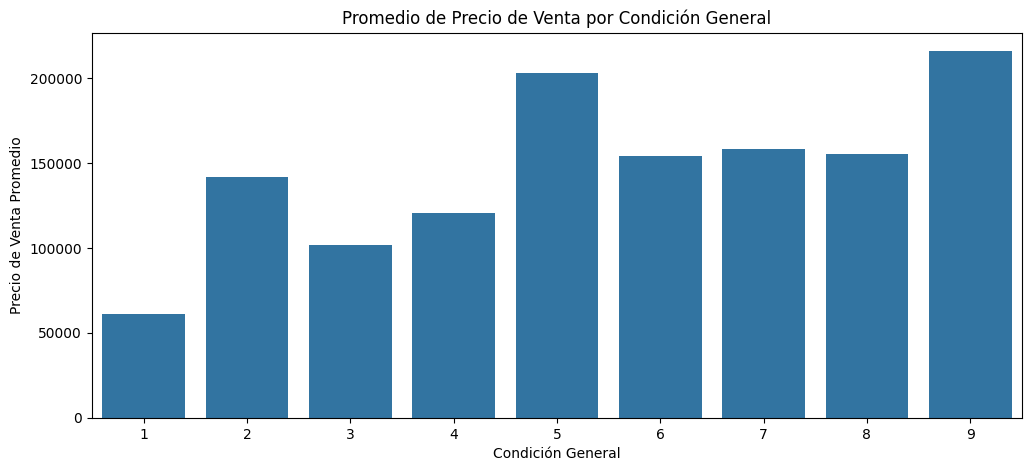

(OverallQual
 1      50150.000000
 2      51770.333333
 3      87473.750000
 4     108420.655172
 5     133523.347607
 6     161603.034759
 7     207716.423197
 8     274735.535714
 9     367513.023256
 10    438588.388889
 Name: SalePrice, dtype: float64,
 OverallCond
 1     61000.000000
 2    141986.400000
 3    101929.400000
 4    120438.438596
 5    203146.914738
 6    153961.591270
 7    158145.487805
 8    155651.736111
 9    216004.545455
 Name: SalePrice, dtype: float64)

In [14]:
# Agrupar por calidad general y calcular el precio promedio de venta
quality_groups = train_df.groupby('OverallQual')['SalePrice'].mean()

# Agrupar por condición general y calcular el precio promedio de venta
condition_groups = train_df.groupby('OverallCond')['SalePrice'].mean()

# Visualizar los grupos
plt.figure(figsize=(12, 5))
sns.barplot(x=quality_groups.index, y=quality_groups.values)
plt.title("Promedio de Precio de Venta por Calidad General")
plt.xlabel("Calidad General")
plt.ylabel("Precio de Venta Promedio")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=condition_groups.index, y=condition_groups.values)
plt.title("Promedio de Precio de Venta por Condición General")
plt.xlabel("Condición General")
plt.ylabel("Precio de Venta Promedio")
plt.show()

quality_groups, condition_groups


## 4. Train y test

El dataset original ya se encontraba dividido en dos conjuntos: entrenamiento (train.csv) y prueba (test.csv)

In [15]:
print(f"Entrenamiento: {train_df.shape[0]} filas")
print(f"Prueba: {test_df.shape[0]} filas")

Entrenamiento: 1460 filas
Prueba: 1459 filas


In [16]:
print(train_df.describe())
print(test_df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [17]:
train_df['OverallQual'].value_counts(normalize=True) * 100



5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: OverallQual, dtype: float64

In [18]:
test_df['OverallQual'].value_counts(normalize=True) * 100

5     29.335161
6     24.468814
7     19.259767
8     11.925977
4      7.539411
9      4.386566
3      1.370802
10     0.891021
2      0.685401
1      0.137080
Name: OverallQual, dtype: float64

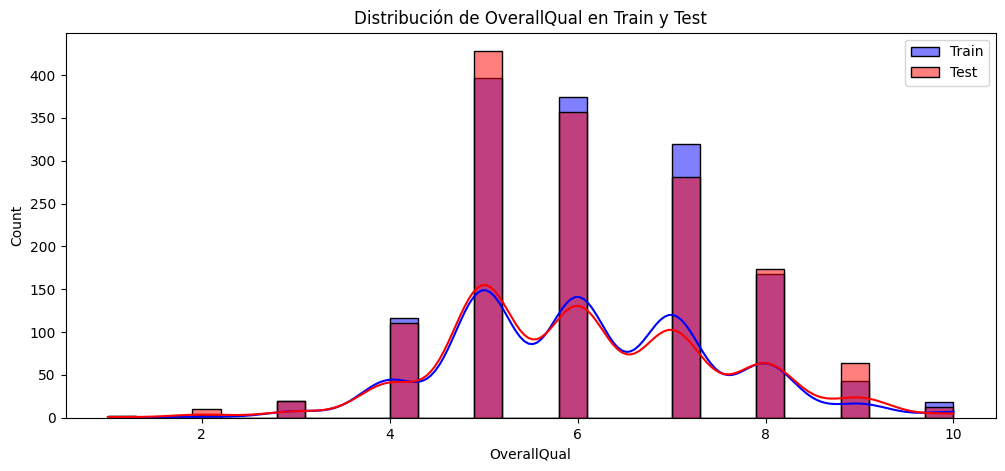

In [19]:
# Distribución en Train
plt.figure(figsize=(12,5))
sns.histplot(train_df["OverallQual"], kde=True, color="blue", label="Train", bins=30)

# Distribución en Test
sns.histplot(test_df["OverallQual"], kde=True, color="red", label="Test", bins=30)

plt.legend()
plt.title("Distribución de OverallQual en Train y Test")
plt.show()

## 5. Ingeniería de características

In [20]:
correlation_matrix = train_df.select_dtypes(include=["number"]).corr()
correlation_target = correlation_matrix["SalePrice"].sort_values(ascending=False)
selected_features = correlation_target[1:10].index.tolist()
print("Variables seleccionadas para el modelo:", selected_features)

Variables seleccionadas para el modelo: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']


## 7. Modelo de Regresión Lineal Univariado

Error Cuadrático Medio (MSE): 2681026163.5090904
Coeficiente de determinación (R²): 0.6504677778896863


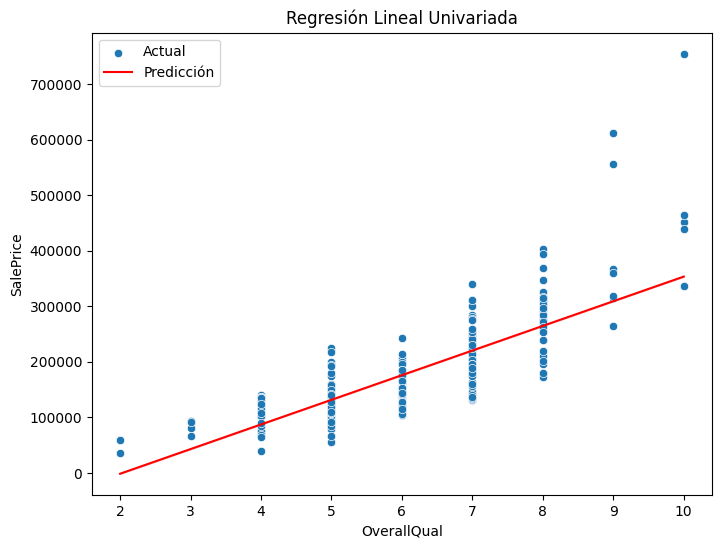

In [21]:
best_feature = selected_features[0]
X = train_df[[best_feature]]
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[best_feature], y=y_test, label="Actual")
sns.lineplot(x=X_test[best_feature], y=y_pred, color='red', label="Predicción")
plt.xlabel(best_feature)
plt.ylabel("SalePrice")
plt.title("Regresión Lineal Univariada")
plt.legend()
plt.show()

## 8. Regresión lineal con todas la variables

In [23]:
# Filtrar solo las columnas numéricas, eliminando 'Id' porque no aporta al modelo
num_features = train_df.select_dtypes(include=["number"]).drop(columns=["Id"])

# Separar X (variables independientes) y y (variable objetivo)
X_train = num_features.drop(columns=["SalePrice"])  # Variables predictoras en el conjunto de entrenamiento
y_train = num_features["SalePrice"]  # Variable objetivo en el conjunto de entrenamiento

# Concatenate X_train and y_train to remove NaNs together
train_data = pd.concat([X_train, y_train], axis=1)
train_data = train_data.dropna()  # Remove rows where any column has NaN

# Now separate them again
X_train = train_data.drop(columns=["SalePrice"])
y_train = train_data["SalePrice"]

# Para el conjunto de prueba, también seleccionamos solo las columnas numéricas
X_test = test_df.select_dtypes(include=["number"]).drop(columns=["Id"])

X_test = X_test.dropna()



Entrenar el modelo de regresión lineal

In [24]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener predicciones en los datos de prueba
y_pred_train = model.predict(X_train)  # Predicción en entrenamiento
y_pred_test = model.predict(X_test)  # Predicción en prueba (sin SalePrice)


Evaluar el modelo en el conjunto de entrenamiento

In [25]:
# Métricas de desempeño en entrenamiento
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print(f"Mean Squared Error (MSE) en entrenamiento: {mse:.2f}")
print(f"R² Score en entrenamiento: {r2:.4f}")


Mean Squared Error (MSE) en entrenamiento: 1311021535.14
R² Score en entrenamiento: 0.8095


Análisis de coeficientes

In [26]:
coefficients = pd.DataFrame({"Feature": X_train.columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients)

          Feature   Coefficient
3     OverallQual  18696.504010
25     GarageCars  16788.400095
16   BsmtFullBath   8979.992041
22   TotRmsAbvGrd   5439.780659
18       FullBath   5389.637271
4     OverallCond   5227.206864
23     Fireplaces   4374.814692
17   BsmtHalfBath   2490.119357
5       YearBuilt    316.968384
6    YearRemodAdd    120.574167
31    ScreenPorch     57.966135
30      3SsnPorch     34.578924
15      GrLivArea     31.686318
7      MasVnrArea     31.604889
27     WoodDeckSF     21.545722
13       2ndFlrSF     14.993426
12       1stFlrSF     14.225476
8      BsmtFinSF1      9.700082
11    TotalBsmtSF      7.689089
29  EnclosedPorch      7.233169
26     GarageArea      6.488245
14   LowQualFinSF      2.467416
9      BsmtFinSF2      0.672481
2         LotArea      0.545353
28    OpenPorchSF     -2.315273
10      BsmtUnfSF     -2.683474
33        MiscVal     -3.850122
24    GarageYrBlt    -49.143148
32       PoolArea    -61.261751
1     LotFrontage   -116.123245
0      M

Resumen del modelo con statsmodels

In [27]:
X_train_sm = sm.add_constant(X_train)  # Agregar constante para la intersección
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())  # Resumen con coeficientes, p-valores y R² ajustado


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     135.7
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:46:34   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1086   BIC:                         2.696e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.232e+05    1.7e+06     -0.190

Predicciones vs Valores Reales

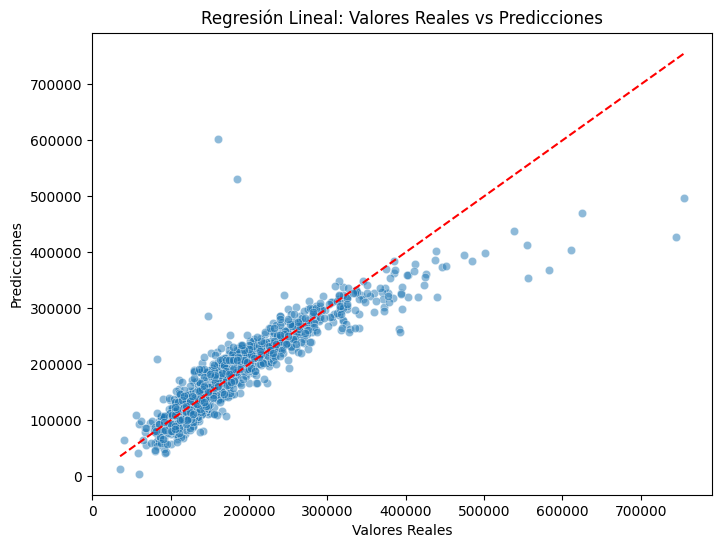

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red", linestyle="--")  # Línea ideal
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores Reales vs Predicciones")
plt.show()


Distribución de los residuos

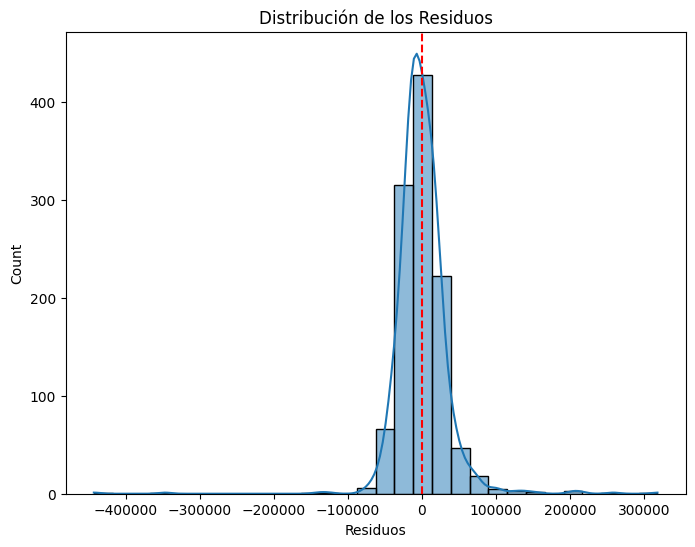

In [29]:
residuals = y_train - y_pred_train

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuos")
plt.title("Distribución de los Residuos")
plt.show()


linea de residuales

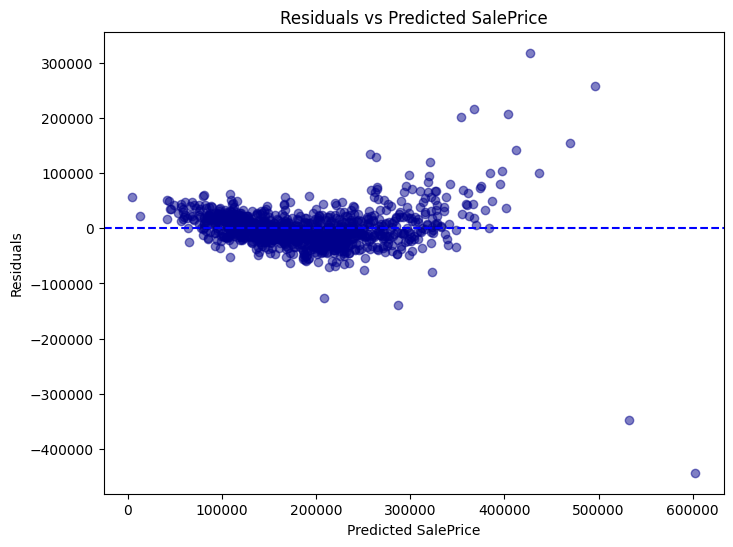

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred_train, residuals, color='darkblue', alpha=0.5)
plt.axhline(0, color='blue', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted SalePrice")
plt.show()

## 9.  multicolinealidad entre las variables

Si VIF > 5 o 10, la variable tiene alta multicolinealidad y podría ser eliminada o combinada con otra.

In [31]:
# Calcular VIF para cada variable en X_train
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Mostrar variables con VIF alto (usualmente > 5 indica alta multicolinealidad)
print(vif_data[vif_data["VIF"] > 5])

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


        Variable           VIF
1    LotFrontage  1.731300e+01
3    OverallQual  7.308071e+01
4    OverallCond  4.964269e+01
5      YearBuilt  2.466581e+04
6   YearRemodAdd  2.450464e+04
8     BsmtFinSF1           inf
9     BsmtFinSF2           inf
10     BsmtUnfSF           inf
11   TotalBsmtSF           inf
12      1stFlrSF           inf
13      2ndFlrSF           inf
14  LowQualFinSF           inf
15     GrLivArea           inf
18      FullBath  2.874419e+01
20  BedroomAbvGr  3.381041e+01
21  KitchenAbvGr  4.203815e+01
22  TotRmsAbvGrd  8.364791e+01
24   GarageYrBlt  2.680925e+04
25    GarageCars  3.980117e+01
26    GarageArea  3.517381e+01
34        MoSold  6.840270e+00
35        YrSold  2.528962e+04


Análisis de Correlación

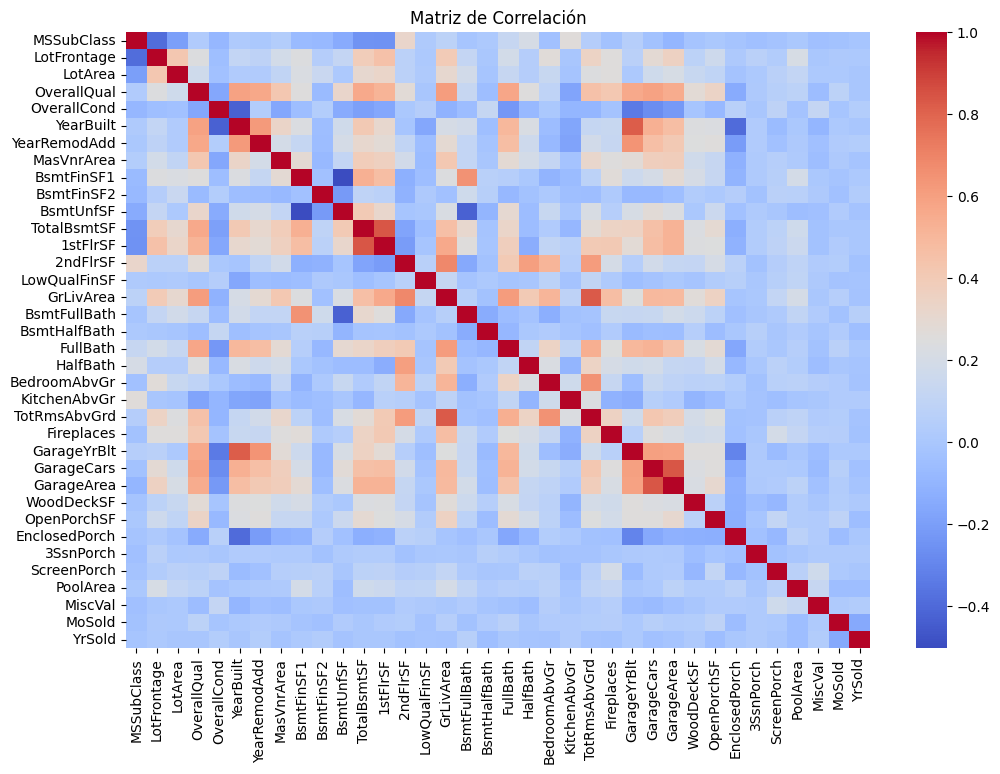

In [32]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [33]:
# Seleccionar las 10 variables más correlacionadas con SalePrice
corr_matrix = train_df.select_dtypes(include=["number"]).corr()
top_corr_features = corr_matrix["SalePrice"].abs().sort_values(ascending=False).head(10)
print(top_corr_features)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


Comprobación de Sobreajuste

In [ ]:
# --- Cross-Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("Cross-validation scores:", cv_mse_scores)
print("Mean score:", cv_mse_scores.mean())

# Convertir a valores positivos
cv_mse_scores = -cv_mse_scores
mean_cv_mse = np.mean(cv_mse_scores)
std_cv_mse = np.std(cv_mse_scores)

print(f"Cross-Validation MSE: {mean_cv_mse:.2f} ± {std_cv_mse:.2f}")

# --- Detectar Overfitting ---
if train_mse < mean_cv_mse * 0.7:
    print("Possible overfitting detected: Train MSE is much lower than CV MSE.")
elif mean_cv_mse > train_mse * 1.5:
    print("High CV MSE compared to Train MSE: Overfitting risk.")
else:
    print("No significant overfitting detected.")


## 10. Corrección del modelo

otro modelo lineal

In [35]:
# Variables con menor colinealidad y mayor correlación
selected_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", 
                     "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt"]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Aplicar modelo Ridge para reducir multicolinealidad
ridge = Ridge(alpha=10)
ridge.fit(X_train_selected, y_train)

# Validación cruzada
cv_scores = cross_val_score(ridge, X_train_selected, y_train, scoring="neg_mean_squared_error", cv=5)
cv_mse = -cv_scores.mean()
cv_std = cv_scores.std()

print(f"Nuevo Cross-Validation MSE: {cv_mse:.2f} ± {cv_std:.2f}")


Nuevo Cross-Validation MSE: 1788928866.93 ± 684571074.79


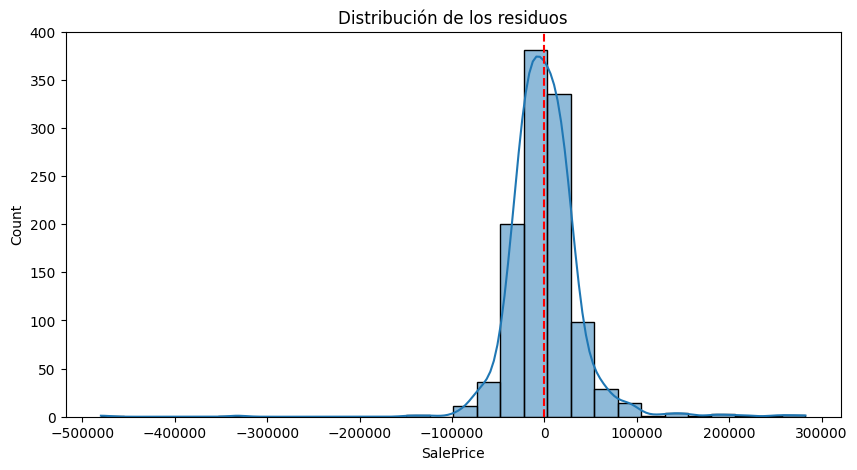

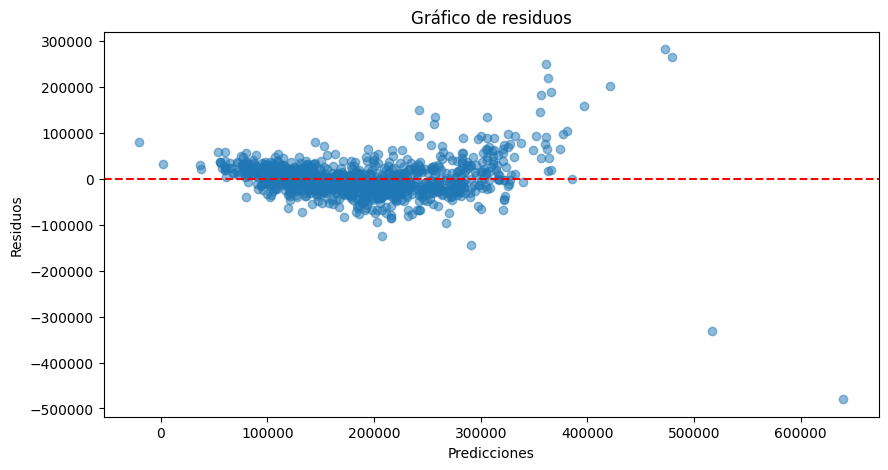

In [36]:
y_train_pred = ridge.predict(X_train_selected)

residuals = y_train - y_train_pred

plt.figure(figsize=(10,5))

# Histograma de los residuos
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribución de los residuos")
plt.show()

# Residual plot
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.show()

modelo Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)

cv_scores_rf = cross_val_score(rf, X_train_selected, y_train, scoring="neg_mean_squared_error", cv=5)
cv_mse_rf = -cv_scores_rf.mean()
cv_std_rf = cv_scores_rf.std()

print(f"Random Forest Cross-Validation MSE: {cv_mse_rf:.2f} ± {cv_std_rf:.2f}")


Random Forest Cross-Validation MSE: 1164105837.69 ± 369790968.93


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

print(f"Best params: {grid_search.best_params_}")
print(f"Best CV MSE: {-grid_search.best_score_:.2f}")



Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV MSE: 1164105837.69


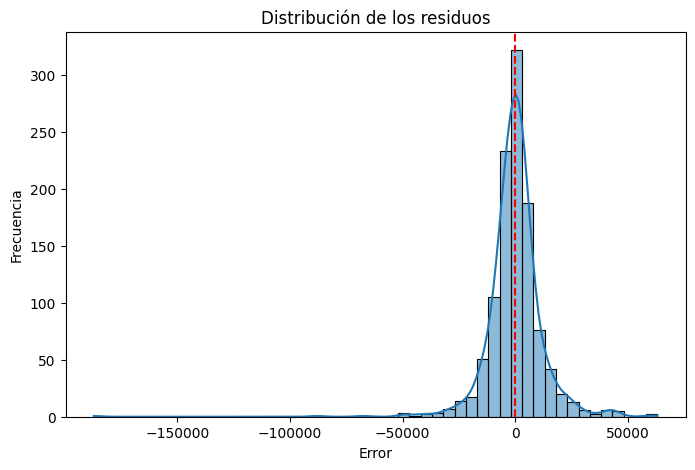

In [39]:
residuals = y_train - grid_search.best_estimator_.predict(X_train_selected)

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.title("Distribución de los residuos")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()


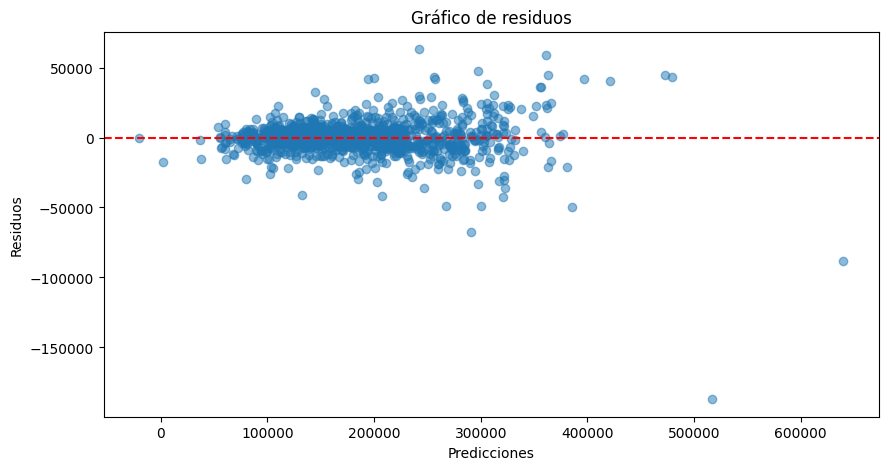

In [183]:
# Residual plot
plt.figure(figsize=(10,5))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.show()

## 11. Evaluación de Modelos con el Conjunto de Prueba

In [40]:
# Modelo 1: Regresión Lineal Múltiple
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Modelo 2: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Modelo 3: Random Forest
best_rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

# Evaluación con validación cruzada
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
cv_scores_ridge = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

# Cálculo de RMSE
rmse_lr = np.sqrt(-cv_scores_lr.mean())
rmse_ridge = np.sqrt(-cv_scores_ridge.mean())
rmse_rf = np.sqrt(-cv_scores_rf.mean())

rmse_lr, rmse_ridge, rmse_rf


(39688.61757280576, 39682.18223004228, 32403.666907977706)

## 12. Discusión sobre la Efectividad de los Modelos


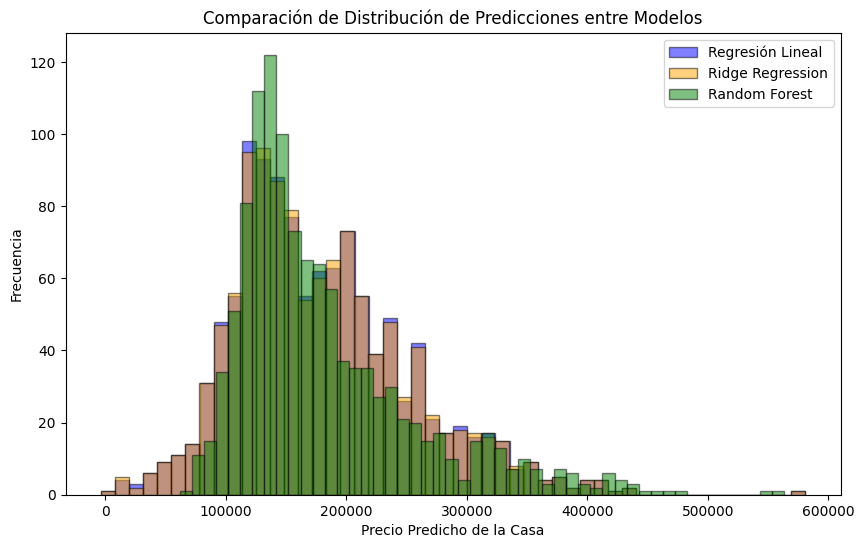

In [41]:
# Comparación de la distribución de precios predichos por cada modelo
plt.figure(figsize=(10, 6))
plt.hist(y_pred_lr, bins=50, alpha=0.5, label="Regresión Lineal", color="blue", edgecolor="black")
plt.hist(y_pred_ridge, bins=50, alpha=0.5, label="Ridge Regression", color="orange", edgecolor="black")
plt.hist(y_pred_rf, bins=50, alpha=0.5, label="Random Forest", color="green", edgecolor="black")
plt.xlabel("Precio Predicho de la Casa")
plt.ylabel("Frecuencia")
plt.title("Comparación de Distribución de Predicciones entre Modelos")
plt.legend()
plt.show()